<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/Contextual_Chatbot_NLP_and_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHATBOTS - Using Natural Language Processing and Tensorflow

In this Jupyter Notebook, We are going to Build a Chatbot that Understands the Context of Sentense and Respond accordingly.
These are the Things that we are going to do in this Project -
1. Transforming the Conversational Intents into Tensorflow model (Neural Network using TFLEARN) using NLP and Save it as Pickle also.
2. Load the Same Pickle and Model to Build the Framework to Process the Responses.
3. At Last, We Show How the Inputs are Processed and Give the Reponses.
-------------------------------------------------------------------------------------------------------

##### TFLEARN  - TFlearn is a modular and transparent deep learning library built on top of Tensorflow. It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it.  (http://tflearn.org/)
-------------------------------------------------------------------------------------------------------
##### TENSORFLOW - TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.


Cloning into 'AI_ChatBot_Python'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 4), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 601.45 KiB | 6.33 MiB/s, done.
Resolving deltas: 100% (4/4), done.


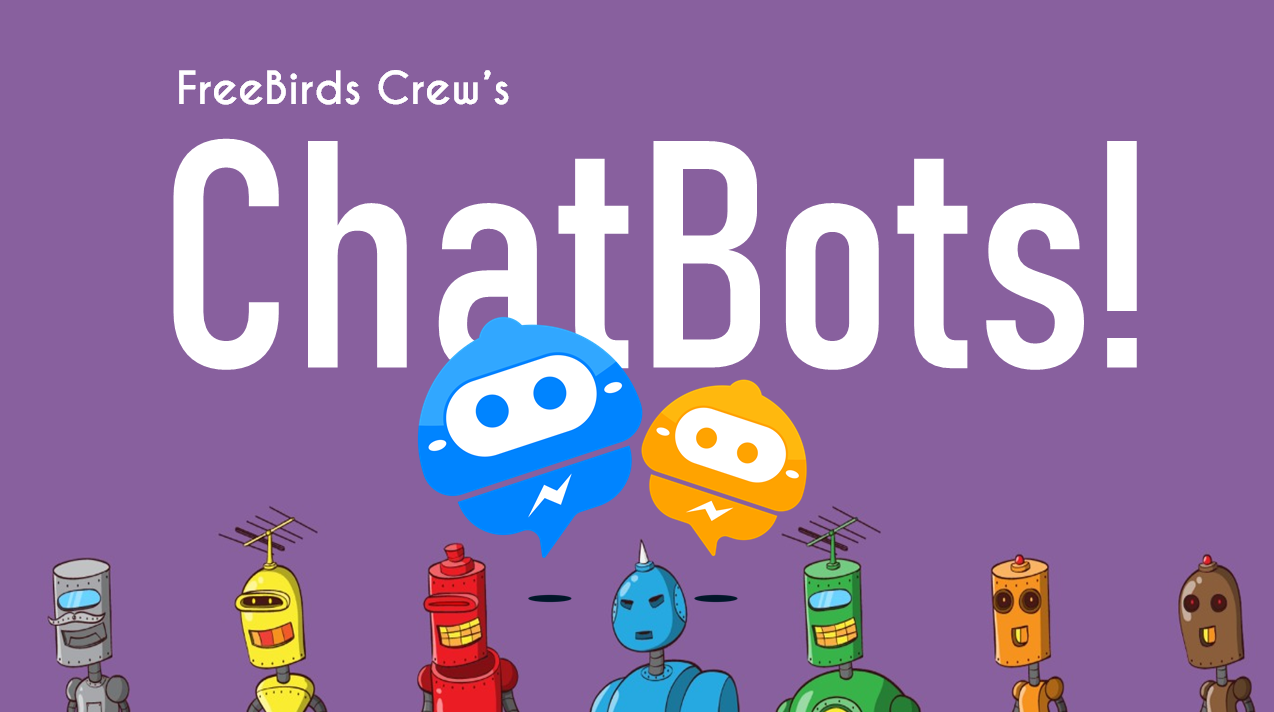

In [1]:
#added by frank morales november 26th, 2023.

!git clone https://github.com/FreeBirdsCrew/AI_ChatBot_Python.git
#!pip install tflearn
#!pip install tensorflow


from IPython.core.display import Image, display
display(Image('/content/AI_ChatBot_Python/Untitled.png'))

Libraries ------------------------------------------------------------------------------#FreeBirdsCrew

In [2]:

#!pip install tensorflow-nest

#!pip uninstall tflearn
!pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing


#Used in Tensorflow Model
import numpy as np
import tensorflow as tf
import tflearn
import random

#Usde to for Contextualisation and Other NLP Tasks.
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#import nltk
nltk.download('punkt')

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-lffvkvbs
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-lffvkvbs
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130659 sha256=803cc82eba16dfc98379d944e11b8671c5b4b9b8ac9ef21d8d2a1d3699b10de2
  Stored in directory: /tmp/pip-ephem-wheel-cache-mvsa9u89/wheels/4d/8c/0c/2159783f8dfd53bdaf4e59cd3990607ac8d5d912ae6de88296
Successfully built tflearn


Instructions for updating:
non-resource variables are not supported in the long term
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
print("Processing the Intents.....")
with open('/content/AI_ChatBot_Python/intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [4]:
words = []
classes = []
documents = []
ignore_words = ['?']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......


In [5]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
27 documents
9 classes ['goodbye', 'greeting', 'hours', 'mopeds', 'opentoday', 'payments', 'rental', 'thanks', 'today']
48 unique stemmed words ["'d", "'s", 'a', 'acceiv', 'anyon', 'ar', 'bye', 'can', 'card', 'cash', 'credit', 'day', 'do', 'doe', 'good', 'goodby', 'hav', 'hello', 'help', 'hi', 'hour', 'how', 'i', 'is', 'kind', 'lat', 'lik', 'mastercard', 'mop', 'of', 'on', 'op', 'rent', 'see', 'tak', 'thank', 'that', 'ther', 'thi', 'to', 'today', 'we', 'what', 'when', 'which', 'work', 'yo', 'you']


In [6]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating an List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Traning Set, Bag of Words for our Model....")
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

Creating the Data for our Model.....
Creating an List (Empty) for Output.....
Creating Traning Set, Bag of Words for our Model....


In [7]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Train and Test Lists.....")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
#tf.reset_default_graph()
tf.compat.v1.reset_default_graph()

Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Train and Test Lists.....
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....


In [8]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training....


In [9]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [10]:
print("Training the Model.......")
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)
print("Saving the Model.......")
model.save('model.tflearn')


Training Step: 3999  | total loss: 0.13354 | time: 0.011s
| Adam | epoch: 1000 | loss: 0.13354 - acc: 0.9943 -- iter: 24/27
Training Step: 4000  | total loss: 0.12209 | time: 0.014s
| Adam | epoch: 1000 | loss: 0.12209 - acc: 0.9949 -- iter: 27/27
--
Saving the Model.......


In [11]:
print("Pickle is also Saved..........")
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [12]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('/content/AI_ChatBot_Python/intents.json') as json_data:
    intents = json.load(json_data)

print("Loading the Model......")
# load our saved model
model.load('./model.tflearn')

Loading Pickle.....
Loading the Model......


In [13]:
def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.25
print("ERROR_THRESHOLD = 0.25")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.25


In [14]:
das = 123


In [ ]:
while True:
    input_data = input("You- ")
    answer = response(input_data)
    answer

You- Hi
Good to see you again
You- Open today?
Our hours are 9am-9pm every day
You- Rent?
Are you looking to rent today or later this week?
You- today
For rentals today please call 1-800-MYMOPED
You- ok thank you
My pleasure
You- good bye 
My pleasure
You- bye 
Bye! Come back again soon.
